In [23]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [5]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
# YOUR CODE HERE!
file_path = 'Resources/lending_data.csv'

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify the data has been loaded successfully
df.head()
# Review the DataFrame
# YOUR CODE HERE!

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [12]:
# Separate the data into labels and features
y = df['loan_status']

# Extract features (X) from the remaining columns
X = df.drop('loan_status', axis=1)

print("Labels (y):")
print(y.head())

print("\nFeatures (X):")
print(X.head())

Labels (y):
0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

Features (X):
   loan_size  interest_rate  borrower_income  debt_to_income  num_of_accounts  \
0    10700.0          7.672            52800        0.431818                5   
1     8400.0          6.692            43600        0.311927                3   
2     9000.0          6.963            46100        0.349241                3   
3    10700.0          7.664            52700        0.430740                5   
4    10800.0          7.698            53000        0.433962                5   

   derogatory_marks  total_debt  
0                 1       22800  
1                 0       13600  
2                 0       16100  
3                 1       22700  
4                 1       23000  


In [9]:
# Review the y variable Series
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
77531    1
77532    1
77533    1
77534    1
77535    1
Name: loan_status, Length: 77536, dtype: int64


In [14]:
# Review the X variable DataFrame
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [15]:
# Check the balance of our target values
label_counts = y.value_counts()

# Display the counts of each unique value in the 'loan_status' column
print("Label Counts:")
print(label_counts)

Label Counts:
loan_status
0    75036
1     2500
Name: count, dtype: int64


### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [16]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Display the shapes of the resulting training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (62028, 7)
Shape of X_test: (15508, 7)
Shape of y_train: (62028,)
Shape of y_test: (15508,)


---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [17]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logistic_regression_model = LogisticRegression(random_state=1)

# Fit the model using training data
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [19]:
# Make a prediction using the testing data
predictions = logistic_regression_model.predict(X_test)

# Display the first few predictions
print("Predictions:")
print(predictions[:10])

Predictions:
[0 0 0 0 0 0 0 0 0 0]


### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [20]:
# Print the balanced_accuracy score of the model
balanced_accuracy = balanced_accuracy_score(y_test, predictions)

# Print the balanced accuracy score
print("Balanced Accuracy Score:", balanced_accuracy)

Balanced Accuracy Score: 0.9521352751368186


Confusion Matrix:
[[14926    75]
 [   46   461]]


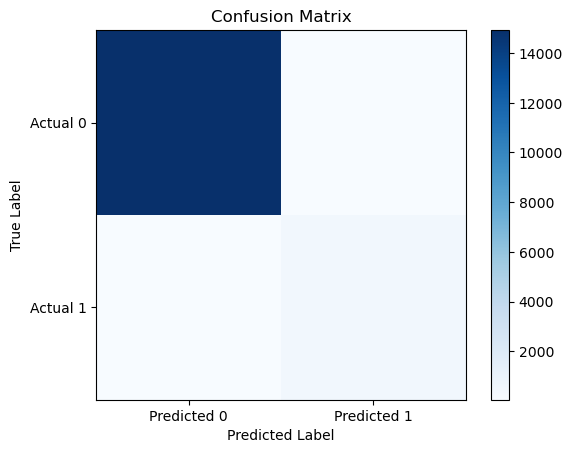

In [25]:
# Generate a confusion matrix for the model
conf_matrix = confusion_matrix(y_test, predictions)


print("Confusion Matrix:")
print(conf_matrix)


plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['Predicted 0', 'Predicted 1'])
plt.yticks([0, 1], ['Actual 0', 'Actual 1'])
plt.show()

In [26]:
# Print the classification report for the model
class_report = classification_report(y_test, predictions)

# Print the classification report
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15001
           1       0.86      0.91      0.88       507

    accuracy                           0.99     15508
   macro avg       0.93      0.95      0.94     15508
weighted avg       0.99      0.99      0.99     15508



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** For class 0 (healthy loan), the model has perfect precision, recall, and F1-score, indicating that it performs extremely well in predicting healthy loans. For class 1 (high-risk loan), the model has good precision (0.86) and recall (0.91), but the F1-score (0.88) suggests a slight imbalance between precision and recall. This indicates that the model is good at identifying high-risk loans but may still miss some. The overall model performance is excellent, with high accuracy and strong performance in predicting healthy loans. The model also performs well in identifying high-risk loans, but there is room for improvement, particularly in balancing precision and recall for class 1.

---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [27]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
random_oversampler = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
X_train_resampled, y_train_resampled = random_oversampler.fit_resample(X_train, y_train)

In [28]:
# Count the distinct values of the resampled labels data
label_counts_resampled = y_train_resampled.value_counts()

# Display the counts of each unique value in the resampled labels data
print("Resampled Label Counts:")
print(label_counts_resampled)

Resampled Label Counts:
loan_status
0    60035
1    60035
Name: count, dtype: int64


### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [29]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logistic_regression_model_resampled = LogisticRegression(random_state=1)

# Fit the model using the resampled training data
logistic_regression_model_resampled.fit(X_train_resampled, y_train_resampled)

# Make a prediction using the testing data
predictions_resampled = logistic_regression_model_resampled.predict(X_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [30]:
# Print the balanced_accuracy score of the model 
balanced_accuracy_resampled = balanced_accuracy_score(y_test, predictions_resampled)

# Print the balanced accuracy score
print("Balanced Accuracy Score (Resampled):", balanced_accuracy_resampled)

Balanced Accuracy Score (Resampled): 0.9941749445500477


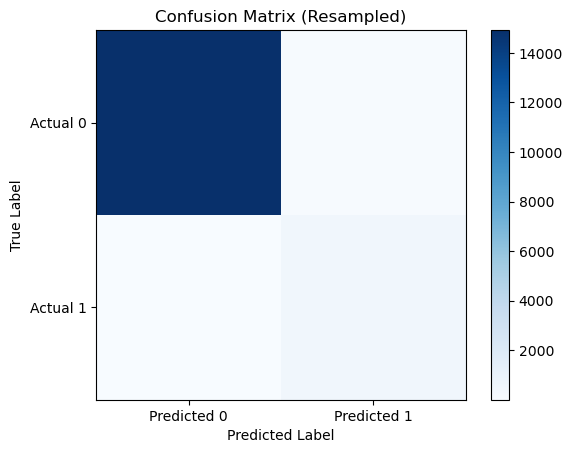

In [31]:
# Generate a confusion matrix for the model
conf_matrix_resampled = confusion_matrix(y_test, predictions_resampled)

# Display the confusion matrix as a heatmap using matplotlib
plt.imshow(conf_matrix_resampled, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix (Resampled)')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['Predicted 0', 'Predicted 1'])
plt.yticks([0, 1], ['Actual 0', 'Actual 1'])
plt.show()

In [32]:
# Print the classification report for the model
class_report_resampled = classification_report(y_test, predictions_resampled)

# Print the classification report
print("Classification Report (Resampled):")
print(class_report_resampled)

Classification Report (Resampled):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     15001
           1       0.85      0.99      0.92       507

    accuracy                           0.99     15508
   macro avg       0.93      0.99      0.96     15508
weighted avg       1.00      0.99      0.99     15508



### Step 4: Answer the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The logistic regression model, trained on oversampled data, performs very well for both healthy and high-risk loans. It shows high accuracy and strong performance in identifying high-risk loans, with improvements in precision and recall for class 1 compared to the model trained on the original data.